In [38]:
import dlib,cv2
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt


In [212]:
# This below mehtod will draw all those points which are from 0 to 67 on face one by one.
def drawPoints(image, faceLandmarks, startpoint, endpoint, isClosed=False):
  points = []
  for i in range(startpoint, endpoint+1):
    point = [faceLandmarks.part(i).x, faceLandmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(image, [points], isClosed, (255, 200, 0), thickness=2, lineType=cv2.LINE_8)

# Use this function for 70-points facial landmark detector model
# we are checking if points are exactly equal to 68, then we draw all those points on face one by one
def facePoints(image, faceLandmarks):
    assert(faceLandmarks.num_parts == 68)
    drawPoints(image, faceLandmarks, 0, 16)           # Jaw line
    drawPoints(image, faceLandmarks, 17, 21)          # Left eyebrow
    drawPoints(image, faceLandmarks, 22, 26)          # Right eyebrow
    drawPoints(image, faceLandmarks, 27, 30)          # Nose bridge
    drawPoints(image, faceLandmarks, 30, 35, True)    # Lower nose
    drawPoints(image, faceLandmarks, 36, 41, True)    # Left eye
    drawPoints(image, faceLandmarks, 42, 47, True)    # Right Eye
    drawPoints(image, faceLandmarks, 48, 59, True)    # Outer lip
    drawPoints(image, faceLandmarks, 60, 67, True)    # Inner lip

# Use this function for any model other than
# 70 points facial_landmark detector model
def facePoints2(image, faceLandmarks, color=(0, 255, 0), radius=4):
  for p in faceLandmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)
def writeFaceLandmarksToLocalFile(faceLandmarks, fileName):
    with open(fileName, 'w') as f:
        for p in faceLandmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y)))

    f.close()

#Load images in the form of array
def load_images(images_list, width, height):
    data = np.zeros((len(images_list), width, height), dtype=np.int16)  # Creating Array of image
    for index, image in enumerate(images_list):
        img = cv2.imread(image)
        image_data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data[index, :, :] = image_data  # placing image in array
    return data.astype('uint8')


In [32]:
# location of the model (path of the model).
Model_PATH = "/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat"


# now from the dlib we are extracting the method get_frontal_face_detector()
# and assign that object result to frontalFaceDetector to detect face from the image with 
# the help of the 68_face_landmarks.dat model
frontalFaceDetector = dlib.get_frontal_face_detector()


# Now the dlip shape_predictor class will take model and with the help of that, it will show 
faceLandmarkDetector = dlib.shape_predictor(Model_PATH)

**begin**

In [89]:
IMAGES_DIR = '/content/drive/MyDrive/ckplus'  # original image directory
sadness_DIR = os.path.join(IMAGES_DIR, 'sadness')
surprise_DIR = os.path.join(IMAGES_DIR, 'surprise')
disgust_DIR = os.path.join(IMAGES_DIR, 'disgust')
anger_DIR = os.path.join(IMAGES_DIR, 'anger')
happiness_DIR = os.path.join(IMAGES_DIR, 'happiness')
fear_DIR = os.path.join(IMAGES_DIR, 'fear')

sadness_pts_DIR = os.path.join(IMAGES_DIR, 'sadness_pts')
surprise_pts_DIR = os.path.join(IMAGES_DIR, 'surprise_pts')
disgust_pts_DIR = os.path.join(IMAGES_DIR, 'disgust_pts')
anger_pts_DIR = os.path.join(IMAGES_DIR, 'anger_pts')
happiness_pts_DIR = os.path.join(IMAGES_DIR, 'happiness_pts')
fear_pts_DIR = os.path.join(IMAGES_DIR, 'fear_pts')


IMG_TYPE = 'png'  
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [26]:
sadness_file_name_list = os.listdir(sadness_DIR)
surprise_file_name_list = os.listdir(surprise_DIR) 
disgust_file_name_list = os.listdir(disgust_DIR) 
anger_file_name_list = os.listdir(anger_DIR) 
happiness_file_name_list = os.listdir(happiness_DIR) 
fear_file_name_list = os.listdir(fear_DIR) 

In [211]:
sadness_file_path_list = list(map(lambda x: os.path.join(sadness_DIR, x),sadness_file_name_list))
surprise_file_path_list = list(map(lambda x: os.path.join(surprise_DIR, x), surprise_file_name_list))
disgust_file_path_list = list(map(lambda x: os.path.join(disgust_DIR, x), disgust_file_name_list))
anger_file_path_list = list(map(lambda x: os.path.join(anger_DIR, x), anger_file_name_list))
happiness_file_path_list = list(map(lambda x: os.path.join(happiness_DIR, x), happiness_file_name_list))
fear_file_path_list = list(map(lambda x: os.path.join(fear_DIR, x), fear_file_name_list))


In [209]:
def main(imageRGB,file_name,opdir):

  file_name=file_name.replace('.png','')
  
  # Now this line will try to detect all faces in an image either 1 or 2 or more faces
  allFaces = frontalFaceDetector(imageRGB, 0)
  # List to store landmarks of all detected faces
  allFacesLandmark = []



  OUTPUT_DIR='/content/drive/MyDrive/output/'+ opdir

  # Below loop we will use to detect all faces one by one and apply landmarks on them

  for k in range(0, len(allFaces)):
      # dlib rectangle class will detecting face so that landmark can apply inside of that area
      faceRectangleDlib = dlib.rectangle(int(allFaces[k].left()),int(allFaces[k].top()),
        int(allFaces[k].right()),int(allFaces[k].bottom()))

      # Now we are running loop on every detected face and putting landmark on that with the help of faceLandmarkDetector
      detectedLandmarks = faceLandmarkDetector(imageRGB, faceRectangleDlib)

      # count number of landmarks we actually detected on image
      if k==0:
          print("Total number of face landmarks detected ",len(detectedLandmarks.parts()))

      # Svaing the landmark one by one to the output folder
      allFacesLandmark.append(detectedLandmarks)

      # Now finally we drawing landmarks on face
      facePoints(imageRGB, detectedLandmarks)

      fileName = OUTPUT_DIR + file_name + ".txt"
      print("Lanmdark is save into ", fileName)

      # Write landmarks to disk
      writeFaceLandmarksToLocalFile(detectedLandmarks, fileName)

      outputNameofImage = OUTPUT_DIR + file_name + ".png"
      print("Saving output image to", outputNameofImage)
      cv2.imwrite(outputNameofImage, imageRGB)
      io.imshow( imageRGB)



Start

In [152]:
# Getting all the images in the form of array
sadness_image_array = load_images(sadness_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)
surprise_image_array = load_images(surprise_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)
disgust_image_array = load_images(disgust_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)
anger_image_array = load_images(anger_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)
happiness_image_array = load_images(happiness_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)
fear_image_array = load_images(fear_file_path_list, width=IMG_WIDTH, height=IMG_HEIGHT)

In [199]:
#Making Directory to save Result
os.makedirs('/content/drive/MyDrive/output/sadness')
os.makedirs('/content/drive/MyDrive/output/surprise')
os.makedirs('/content/drive/MyDrive/output/disgust')
os.makedirs('/content/drive/MyDrive/output/anger')
os.makedirs('/content/drive/MyDrive/output/happiness')
os.makedirs('/content/drive/MyDrive/output/fear')

Total number of face landmarks detected  68
Lanmdark is save into  /content/drive/MyDrive/output/sadness/AF03SAS.txt
Saving output image to /content/drive/MyDrive/output/sadness/AF03SAS.png
Total number of face landmarks detected  68
Lanmdark is save into  /content/drive/MyDrive/output/sadness/AF02SAS.txt
Saving output image to /content/drive/MyDrive/output/sadness/AF02SAS.png
Total number of face landmarks detected  68
Lanmdark is save into  /content/drive/MyDrive/output/sadness/AF05SAS.txt
Saving output image to /content/drive/MyDrive/output/sadness/AF05SAS.png
Total number of face landmarks detected  68
Lanmdark is save into  /content/drive/MyDrive/output/sadness/AF01SAS.txt
Saving output image to /content/drive/MyDrive/output/sadness/AF01SAS.png
Total number of face landmarks detected  68
Lanmdark is save into  /content/drive/MyDrive/output/sadness/AF07SAS.txt
Saving output image to /content/drive/MyDrive/output/sadness/AF07SAS.png
Total number of face landmarks detected  68
Lanmda

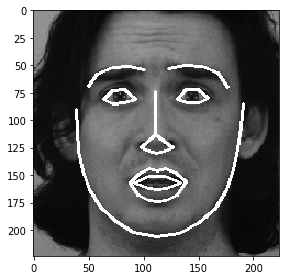

In [210]:
#Finally calling main to draw landmark and to save landmark Text file.
for i in range(len(sadness_image_array)):
  main(sadness_image_array[i],sadness_file_name_list[i], 'sadness/')

for i in range(len(surprise_image_array)):
  main(surprise_image_array[i],surprise_file_name_list[i],'surprise/')

for i in range(len(disgust_image_array)):
  main(disgust_image_array[i],disgust_file_name_list[i],'disgust/')

for i in range(len(anger_image_array)):
  main(anger_image_array[i],anger_file_name_list[i],'anger/')

for i in range(len(happiness_image_array)):
  main(happiness_image_array[i],happiness_file_name_list[i],'happiness/')

for i in range(len(fear_image_array)):
  main(fear_image_array[i],fear_file_name_list[i],'fear/')